# Example plot for visualizing the weight decay objective, and active neurons

In this Jupyter notebook, we present a visualization of the weight decay objective and the percentage of active neurons during training. The aim of this notebook is to showcase the faster minimization of the weight decay target using PathProx compared to plain weight decay, while also favoring a sparser solution to the weight decay objective.

Although PathProx can accelerate the regularization term minimization, it is not expected to decay the weight decay objective faster than plain weight decay when the training loss is non-zero. This is because the training dynamic for non-smooth and non-convex functions can be quite unpredictable. However, once the training loss reaches zero and the overfitting phase begins, PathProx will demonstrate faster decay.

To highlight this, we have chosen an extremely long training epoch and used the same weight decay parameter ($\lambda$) but with the maximum possible learning rate. It is worth noting that this approach differs from the typical practice when training a deep neural network, as people often combine other regularization techniques such as early stopping, etc.

In [1]:
import torch
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


In [2]:
fig_hparam = {
    'figsize': (10, 6),
    'labelsize': 15,
    'fontsize': 15,
    'titlesize': 20,
    'markersize': 40
}

color_dict = {'wd': '#2986cc', 'pathprox': '#dc4848', 'loss': '#afafaf'}
plt.rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 28})
matplotlib.rcParams.update({'figure.autolayout': True})


In [3]:
def get_results(dest_dir):
    result_PATH = os.path.join(prefix, dest_dir, 'result.pt')
    result = torch.load(result_PATH, map_location=torch.device('cpu'))
    
    test_acc = result['acc']['test']
    train_acc = result['acc']['train']
    val_acc = result['acc']['val']

    loss = result['loss']['train_loss']
    total_pn = result['loss']['total_pn']
    
    total_nz = result['act']['total_nz']
    
    
    results_dict = {'train_acc': train_acc, 
                    'val_acc': val_acc,
                    'test_acc': test_acc,
                    'loss': loss,
                    'total_pn': total_pn,
                    'total_nz': total_nz,
                    'result_name': dest_dir
                   }
    
    return results_dict

## Get results for MNIST subset + MLP Factorized
When trained, we use weight decay parameter $\lambda=0.0001$, learning rate 0.3, and train for 100k iterations. An iteration is one gradient update over a batched input.

In [4]:
prefix = './results/MNIST_subset_mlp_factorized/'

pathprox_result_name = "0702134520_pathprox"
wd_result_name = "0702134520_wd"

pathprox_result = get_results(pathprox_result_name)
wd_result = get_results(wd_result_name)

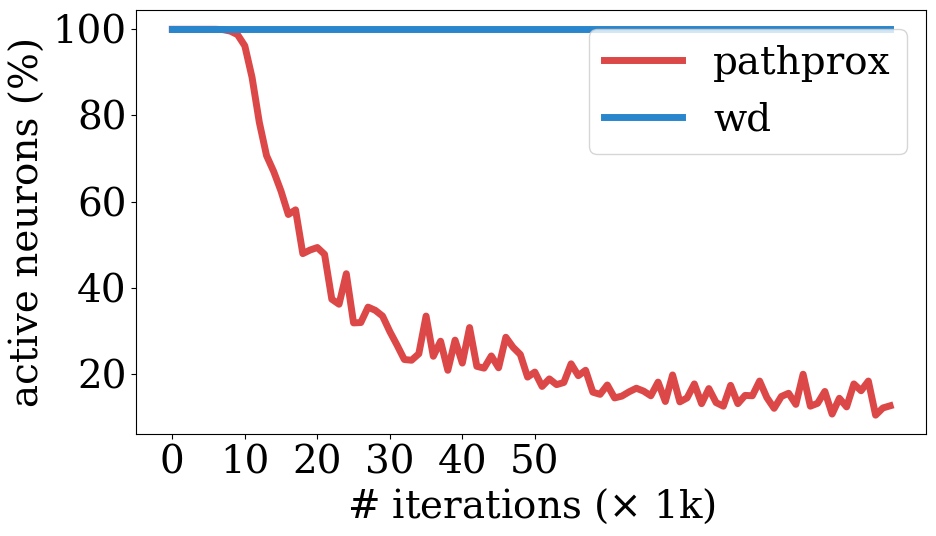

In [5]:
fig, ax = plt.subplots(1, figsize=fig_hparam['figsize'])
plt.plot([item for item in pathprox_result['total_nz']], color=color_dict['pathprox'], lw=5, label='pathprox')
plt.plot([item for item in wd_result['total_nz']], color=color_dict['wd'], lw=5, label='wd')
plt.xticks(np.arange(0, 51, 10), np.arange(0, 51, 10))
plt.xlabel(r"# iterations ($\times$ 1k)")
plt.ylabel("active neurons (%)")
plt.legend()
plt.show()

In [6]:
def get_loss_obj_pn(result_dict, lam):
    pn = result_dict['total_pn']
    loss = result_dict['loss']
    result_list = []
    for idx in range(len(pn)):
        tmp = pn[idx] * lam + loss[idx]
        result_list.append(tmp)
    return result_list


def get_loss_obj(result_dict, lam):
    loss = result_dict['loss']
    return loss


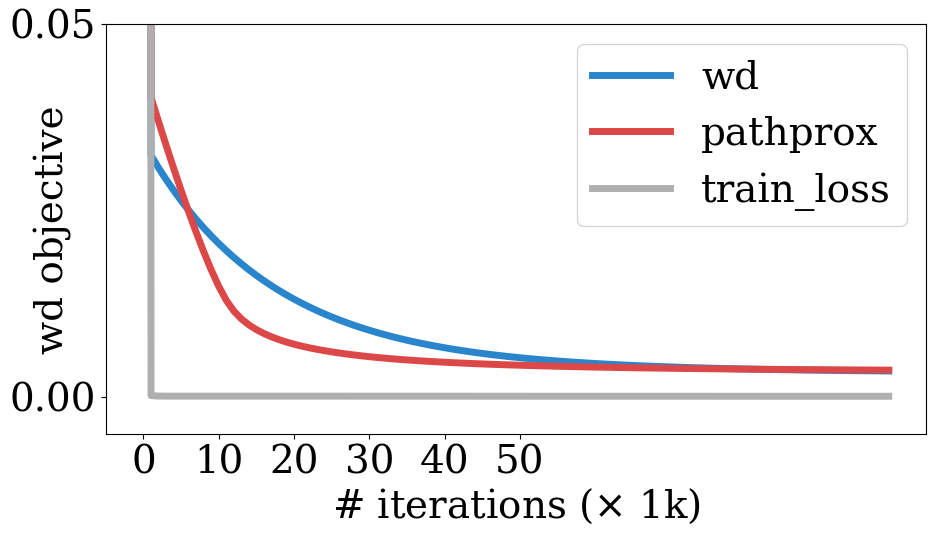

In [7]:
lam = 1e-4
fig, ax = plt.subplots(1, figsize=fig_hparam['figsize'])
wd_loss_obj = get_loss_obj_pn(wd_result, lam)
pathprox_loss_obj = get_loss_obj_pn(pathprox_result, lam)
wd_loss_obj2 = get_loss_obj(wd_result, lam)
plt.plot(wd_loss_obj, label='wd', color=color_dict['wd'], lw=5)
plt.plot(pathprox_loss_obj, label='pathprox', color=color_dict['pathprox'], lw=5)
plt.plot(wd_loss_obj2, color=color_dict['loss'], lw=5, label='train_loss')
plt.ylim([-0.005, 0.05])
plt.yticks([0, 0.05], fontsize=28)
plt.legend()
plt.xticks(np.arange(0, 51, 10), np.arange(0, 51, 10))
plt.xlabel(r"# iterations ($\times$ 1k)")
ax.set_ylabel('wd objective', labelpad=-45)

plt.show()


## Get results for MNIST + MLP
When trained, we use weight decay parameter $\lambda=0.0001$, learning rate 0.1, and train for 100k iterations. An iteration is one gradient update over a batched input.

In [8]:
prefix = './results/MNIST_mlp/'

pathprox_result_name = "0702214146_pathprox"
wd_result_name = "0702214146_wd"

pathprox_result = get_results(pathprox_result_name)
wd_result = get_results(wd_result_name)

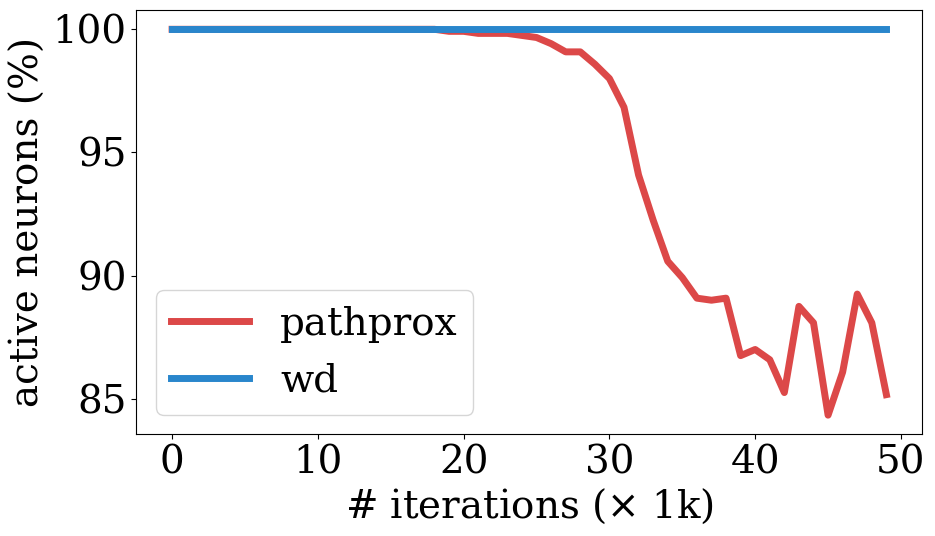

In [9]:
fig, ax = plt.subplots(1, figsize=fig_hparam['figsize'])
plt.plot([item for item in pathprox_result['total_nz']], color=color_dict['pathprox'], lw=5, label='pathprox')
plt.plot([item for item in wd_result['total_nz']], color=color_dict['wd'], lw=5, label='wd')
plt.xticks(np.arange(0, 51, 10), np.arange(0, 51, 10))
plt.xlabel(r"# iterations ($\times$ 1k)")
plt.ylabel("active neurons (%)")
plt.legend()
plt.show()

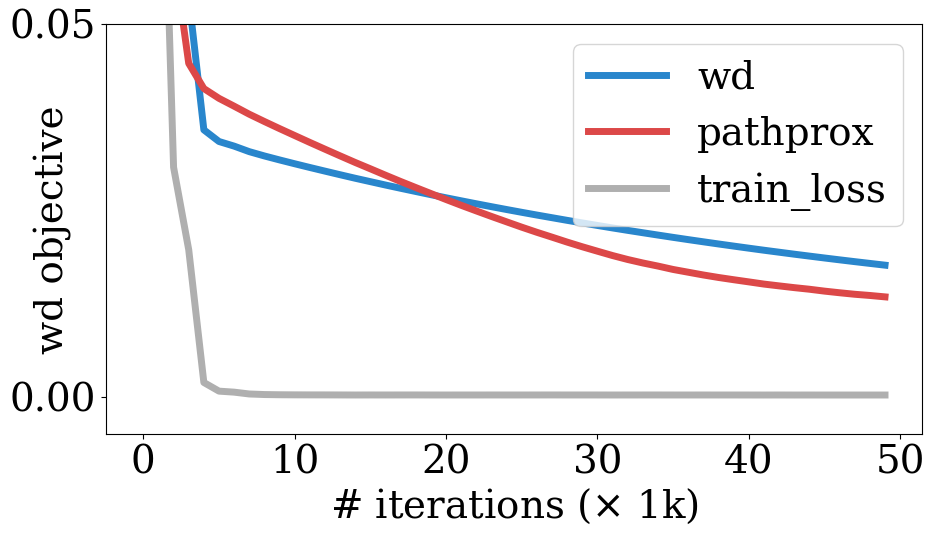

In [10]:
lam = 1e-4
fig, ax = plt.subplots(1, figsize=fig_hparam['figsize'])
wd_loss_obj = get_loss_obj_pn(wd_result, lam)
pathprox_loss_obj = get_loss_obj_pn(pathprox_result, lam)
wd_loss_obj2 = get_loss_obj(wd_result, lam)
# pathprox_loss_obj2 = get_loss_obj(pathprox_result, lam)
plt.plot(wd_loss_obj, label='wd', color=color_dict['wd'], lw=5)
plt.plot(pathprox_loss_obj, label='pathprox', color=color_dict['pathprox'], lw=5)
plt.plot(wd_loss_obj2, color=color_dict['loss'], lw=5, label='train_loss')
plt.ylim([-0.005, 0.05])
plt.yticks([0, 0.05], fontsize=28)
plt.legend()
plt.xticks(np.arange(0, 51, 10), np.arange(0, 51, 10))
plt.xlabel(r"# iterations ($\times$ 1k)")
ax.set_ylabel('wd objective', labelpad=-45)

plt.show()


## Get results for CIFAR10 + VGG
We use weight decay parameter $\lambda=0.001$, learning rate 0.1, and train for 1000 epochs, with learning rate decay at 80 and 120 epochs. An epoch is a complete pass through the entire training dataset.

In [11]:
prefix = './results/CIFAR10_VGG19/'

pathprox_result_name = "0702134520_pathprox"
wd_result_name = "0702134520_wd"

pathprox_result = get_results(pathprox_result_name)
wd_result = get_results(wd_result_name)

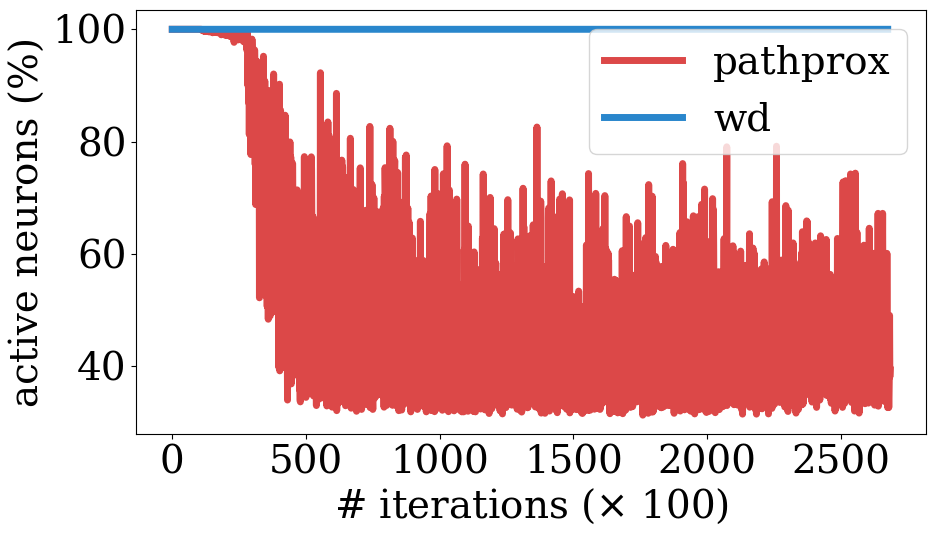

In [12]:
fig, ax = plt.subplots(1, figsize=fig_hparam['figsize'])
plt.plot([item for item in pathprox_result['total_nz']], color=color_dict['pathprox'], lw=5, label='pathprox')
plt.plot([item for item in wd_result['total_nz']], color=color_dict['wd'], lw=5, label='wd')
plt.xlabel(r"# iterations ($\times$ 100)")
plt.ylabel("active neurons (%)")
plt.legend()
plt.show()

In the figure below, it is apparent that after the training loss reaches zero, the weight decay objective value is decreasing at a faster rate using PathProx compared to plain weight decay (compare slopes of curves).  However, in this experiment the weight decay objective value when the training loss reaches zero is larger for the PathProx solution.

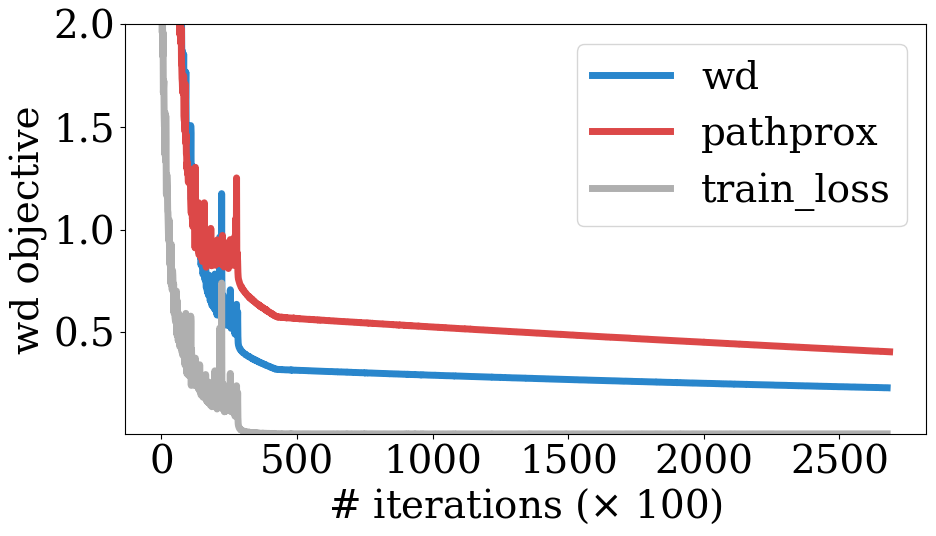

In [13]:
lam = 1e-3
fig, ax = plt.subplots(1, 1, figsize=fig_hparam['figsize'])
color_dict = {'wd': '#2986cc', 'pathprox': '#dc4848', 'loss': '#afafaf'}

plt.rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 28})
matplotlib.rcParams.update({'figure.autolayout': True})

wd_loss_obj = get_loss_obj_pn(wd_result, lam)
pathprox_loss_obj = get_loss_obj_pn(pathprox_result, lam)
wd_loss_obj2 = get_loss_obj(wd_result, lam)
plt.plot(wd_loss_obj, label='wd', color=color_dict['wd'], lw=5)
plt.plot(pathprox_loss_obj, label='pathprox', color=color_dict['pathprox'], lw=5)
plt.plot(wd_loss_obj2, color=color_dict['loss'], lw=5, label='train_loss')
plt.ylim([0.001, 2])
plt.legend()
plt.xlabel(r"# iterations ($\times$ 100)")
ax.set_ylabel('wd objective')

plt.show()
